In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
from pathlib import Path
import json


READING RAW JSON FILES

In [2]:
#reading json files from raw_data folder
raw_movies_json_folder = Path('../raw_data')
json_files = raw_movies_json_folder.glob('*.json')

all_movies = []

for file in json_files:
    with open(file, "r", encoding="utf-8") as f:
        movie = json.load(f)
        all_movies.append(movie)
    f.close()

movies_df = pd.DataFrame(all_movies)
movies_df


,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,origin_country,original_language,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,/u2bZhH3nTf0So0UIC1QxAqBvC07.jpg,"{'id': 386382, 'name': 'Frozen Collection', 'p...",150000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://movies.disney.com/frozen,109445,tt2294629,[US],en,...,2013-11-20,1274219009,102,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Who will save the day? The ice guy? The nice g...,Frozen,False,7.200,17183
1,False,/cbcpDn6XJaIGoOil1bKuskU8ds4.jpg,"{'id': 1241, 'name': 'Harry Potter Collection'...",125000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",https://www.warnerbros.com/movies/harry-potter...,12445,tt1201607,[GB],en,...,2011-07-12,1341511219,130,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,It all ends.,Harry Potter and the Deathly Hallows: Part 2,False,8.100,21452
2,False,/dF6FjTZzRTENfB4R17HDN20jLT2.jpg,"{'id': 328, 'name': 'Jurassic Park Collection'...",150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.jurassicworld.com/,135397,tt0369610,[US],en,...,2015-06-06,1671537444,124,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The park is open.,Jurassic World,False,6.699,21123
3,False,/8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,[US],en,...,2015-12-15,2068223624,136,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Every generation has a story.,Star Wars: The Force Awakens,False,7.300,20103
4,False,/ehzI1mVcnHqB58NqPyQwpMqcVoz.jpg,"{'id': 9485, 'name': 'The Fast and the Furious...",190000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",https://www.uphe.com/movies/furious-7,168259,tt2820852,[US],en,...,2015-04-01,1515400000,139,"[{'english_name': 'Arabic', 'iso_639_1': 'ar',...",Released,Vengeance hits home.,Furious 7,False,7.223,11031
5,False,/5Iw7zQTHVRBOYpA0V6z0yypOPZh.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",https://www.starwars.com/films/star-wars-episo...,181808,tt2527336,[US],en,...,2017-12-13,1332698830,152,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the Past Die,Star Wars: The Last Jedi,False,6.800,15926
6,False,/7JNzw1tSZZEgsBw6lu0VfO2X2Ef.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.avatar.com/movies/avatar,19995,tt0499549,[US],en,...,2009-12-15,2923706026,162,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Enter the world of Pandora.,Avatar,False,7.594,32858
7,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428,tt0848228,[US],en,...,2012-04-25,1518815515,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,False,7.866,34238
8,False,/mabuNsGJgRuCTuGqjFkWe1xdu19.jpg,"{'id': 468222, 'name': 'The Incredibles Collec...",200000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://movies.disney.com/incredibles-2,260513,tt3606756,[US],en,...,2018-06-14,1243225667,118,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"It's been too long, dahlings.",Incredibles 2,False,7.456,13368
9,False,/b6ZJZHUdMEFECvGiDpJjlfUWela.jpg,"{'id': 529892, 'name': 'Black Panther Collecti...",200000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.marvel.com/movies/black-panther,284054,tt1825683,[US],en,...,2018-02-13,1349926083,135,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Long live the king.,Black Panther,False,7.366,22972


DROPPING IRRELEVANT COLUMNS

In [29]:
def drop_irrelevant_columns(movies_df):
    try:
        #dropping unwanted columns
        drop_columns = ['adult', 'imdb_id', 'original_title', 'video', 'homepage']
        movies_df = movies_df.drop(columns=drop_columns, errors='ignore')
        return movies_df
    except Exception as e:
        logging.error(f"Error: {e}")
        return ""

movies_df = drop_irrelevant_columns(movies_df)
movies_df


,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,status,tagline,title,vote_average,vote_count,profit,roi,franchise_type,collection_name,year
0,/u2bZhH3nTf0So0UIC1QxAqBvC07.jpg,Frozen Collection,150000000,Animation|Family|Adventure|Fantasy,109445,[US],en,Young princess Anna of Arendelle dreams about ...,18.60,/itAKcobTYGpYT8Phwjd8c9hleTo.jpg,...,Released,Who will save the day? The ice guy? The nice g...,Frozen,7.20,17183,1124219009,8.49,Franchise,Frozen Collection,2013
1,/cbcpDn6XJaIGoOil1bKuskU8ds4.jpg,Harry Potter Collection,125000000,Adventure|Fantasy,12445,[GB],en,"Harry, Ron and Hermione continue their quest t...",17.47,/c54HpQmuwXjHq2C9wmoACjxoom3.jpg,...,Released,It all ends.,Harry Potter and the Deathly Hallows: Part 2,8.10,21452,1216511219,10.73,Franchise,Harry Potter Collection,2011
2,/dF6FjTZzRTENfB4R17HDN20jLT2.jpg,Jurassic Park Collection,150000000,Action|Adventure|Science Fiction|Thriller,135397,[US],en,Twenty-two years after the events of Jurassic ...,9.49,/rhr4y79GpxQF9IsfJItRXVaoGs4.jpg,...,Released,The park is open.,Jurassic World,6.70,21123,1521537444,11.14,Franchise,Jurassic Park Collection,2015
3,/8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg,Star Wars Collection,245000000,Adventure|Action|Science Fiction,140607,[US],en,Thirty years after defeating the Galactic Empi...,7.39,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,...,Released,Every generation has a story.,Star Wars: The Force Awakens,7.30,20103,1823223624,8.44,Franchise,Star Wars Collection,2015
4,/ehzI1mVcnHqB58NqPyQwpMqcVoz.jpg,The Fast and the Furious Collection,190000000,Action|Crime|Thriller,168259,[US],en,Deckard Shaw seeks revenge against Dominic Tor...,8.14,/ktofZ9Htrjiy0P6LEowsDaxd3Ri.jpg,...,Released,Vengeance hits home.,Furious 7,7.22,11031,1325400000,7.98,Franchise,The Fast and the Furious Collection,2015
5,/5Iw7zQTHVRBOYpA0V6z0yypOPZh.jpg,Star Wars Collection,300000000,Adventure|Action|Science Fiction,181808,[US],en,Rey develops her newly discovered abilities wi...,6.07,/kOVEVeg59E0wsnXmF9nrh6OmWII.jpg,...,Released,Let the Past Die,Star Wars: The Last Jedi,6.80,15926,1032698830,4.44,Franchise,Star Wars Collection,2017
6,/7JNzw1tSZZEgsBw6lu0VfO2X2Ef.jpg,Avatar Collection,237000000,Action|Adventure|Fantasy|Science Fiction,19995,[US],en,"In the 22nd century, a paraplegic Marine is di...",26.49,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,...,Released,Enter the world of Pandora.,Avatar,7.59,32858,2686706026,12.34,Franchise,Avatar Collection,2009
7,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,The Avengers Collection,220000000,Science Fiction|Action|Adventure,24428,[US],en,When an unexpected enemy emerges and threatens...,41.59,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,...,Released,Some assembly required.,The Avengers,7.87,34238,1298815515,6.90,Franchise,The Avengers Collection,2012
8,/mabuNsGJgRuCTuGqjFkWe1xdu19.jpg,The Incredibles Collection,200000000,Action|Adventure|Animation|Family,260513,[US],en,Elastigirl springs into action to save the day...,9.77,/9lFKBtaVIhP7E2Pk0IY1CwTKTMZ.jpg,...,Released,"It's been too long, dahlings.",Incredibles 2,7.46,13368,1043225667,6.22,Franchise,The Incredibles Collection,2018
9,/b6ZJZHUdMEFECvGiDpJjlfUWela.jpg,Black Panther Collection,200000000,Action|Adventure|Science Fiction,284054,[US],en,"King T'Challa returns home to the reclusive, t...",8.45,/uxzzxijgPIY7slzFvMotPv8wjKA.jpg,...,Released,Long live the king.,Black Panther,7.37,22972,1149926083,6.75,Franchise,Black Panther Collection,2018


EVALUATING JSON-LIKE COLUMNS, EXTRACTING AND CLEANING KEY DATA POINTS

In [30]:
def extract_name(value, key="name"):
    try:
        # Already processed (string)
        if isinstance(value, str):
            return value

        # Case 1: List of dicts
        if isinstance(value, list):
            values = [item.get(key, "") for item in value if isinstance(item, dict)]
            return "|".join(values)

        # Case 2: Single dict
        if isinstance(value, dict):
            return value.get(key, "")

        # Anything else → treat as empty
        return np.nan
    except Exception as e:
        logging.error(f"Error extracting names: {e}")
        return ""


EXTRACTING NAME FROM COLUMNS

In [31]:
def extracting_name_from_columns(movies_df):
    try:
        columns = [
            'belongs_to_collection',
            'genres', 
            'production_countries', 
            'production_companies', 
            'spoken_languages'
        ]

        for column in columns:
            movies_df[column] = movies_df[column].apply(
                lambda value: extract_name(value)
            )

        return movies_df
    except Exception as e:
        logging.error(f"Error extracting names: {e}")
        return ""

extracting_name_from_columns(movies_df)

,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,status,tagline,title,vote_average,vote_count,profit,roi,franchise_type,collection_name,year
0,/u2bZhH3nTf0So0UIC1QxAqBvC07.jpg,Frozen Collection,150000000,Animation|Family|Adventure|Fantasy,109445,[US],en,Young princess Anna of Arendelle dreams about ...,18.60,/itAKcobTYGpYT8Phwjd8c9hleTo.jpg,...,Released,Who will save the day? The ice guy? The nice g...,Frozen,7.20,17183,1124219009,8.49,Franchise,Frozen Collection,2013
1,/cbcpDn6XJaIGoOil1bKuskU8ds4.jpg,Harry Potter Collection,125000000,Adventure|Fantasy,12445,[GB],en,"Harry, Ron and Hermione continue their quest t...",17.47,/c54HpQmuwXjHq2C9wmoACjxoom3.jpg,...,Released,It all ends.,Harry Potter and the Deathly Hallows: Part 2,8.10,21452,1216511219,10.73,Franchise,Harry Potter Collection,2011
2,/dF6FjTZzRTENfB4R17HDN20jLT2.jpg,Jurassic Park Collection,150000000,Action|Adventure|Science Fiction|Thriller,135397,[US],en,Twenty-two years after the events of Jurassic ...,9.49,/rhr4y79GpxQF9IsfJItRXVaoGs4.jpg,...,Released,The park is open.,Jurassic World,6.70,21123,1521537444,11.14,Franchise,Jurassic Park Collection,2015
3,/8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg,Star Wars Collection,245000000,Adventure|Action|Science Fiction,140607,[US],en,Thirty years after defeating the Galactic Empi...,7.39,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,...,Released,Every generation has a story.,Star Wars: The Force Awakens,7.30,20103,1823223624,8.44,Franchise,Star Wars Collection,2015
4,/ehzI1mVcnHqB58NqPyQwpMqcVoz.jpg,The Fast and the Furious Collection,190000000,Action|Crime|Thriller,168259,[US],en,Deckard Shaw seeks revenge against Dominic Tor...,8.14,/ktofZ9Htrjiy0P6LEowsDaxd3Ri.jpg,...,Released,Vengeance hits home.,Furious 7,7.22,11031,1325400000,7.98,Franchise,The Fast and the Furious Collection,2015
5,/5Iw7zQTHVRBOYpA0V6z0yypOPZh.jpg,Star Wars Collection,300000000,Adventure|Action|Science Fiction,181808,[US],en,Rey develops her newly discovered abilities wi...,6.07,/kOVEVeg59E0wsnXmF9nrh6OmWII.jpg,...,Released,Let the Past Die,Star Wars: The Last Jedi,6.80,15926,1032698830,4.44,Franchise,Star Wars Collection,2017
6,/7JNzw1tSZZEgsBw6lu0VfO2X2Ef.jpg,Avatar Collection,237000000,Action|Adventure|Fantasy|Science Fiction,19995,[US],en,"In the 22nd century, a paraplegic Marine is di...",26.49,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,...,Released,Enter the world of Pandora.,Avatar,7.59,32858,2686706026,12.34,Franchise,Avatar Collection,2009
7,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,The Avengers Collection,220000000,Science Fiction|Action|Adventure,24428,[US],en,When an unexpected enemy emerges and threatens...,41.59,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,...,Released,Some assembly required.,The Avengers,7.87,34238,1298815515,6.90,Franchise,The Avengers Collection,2012
8,/mabuNsGJgRuCTuGqjFkWe1xdu19.jpg,The Incredibles Collection,200000000,Action|Adventure|Animation|Family,260513,[US],en,Elastigirl springs into action to save the day...,9.77,/9lFKBtaVIhP7E2Pk0IY1CwTKTMZ.jpg,...,Released,"It's been too long, dahlings.",Incredibles 2,7.46,13368,1043225667,6.22,Franchise,The Incredibles Collection,2018
9,/b6ZJZHUdMEFECvGiDpJjlfUWela.jpg,Black Panther Collection,200000000,Action|Adventure|Science Fiction,284054,[US],en,"King T'Challa returns home to the reclusive, t...",8.45,/uxzzxijgPIY7slzFvMotPv8wjKA.jpg,...,Released,Long live the king.,Black Panther,7.37,22972,1149926083,6.75,Franchise,Black Panther Collection,2018


CHECKING ANOMALIES USING VALUE_COUNTS()

In [6]:
def check_anomalies(movies_df):
    try:
        columns = ['genres', 'spoken_languages', 
                'production_companies', 
                'production_countries', 
                'belongs_to_collection']
        
        result = {}
        for col in columns:
            # value_counts shows the top values including NaN
            result[col] = [movies_df[col].value_counts()]
        return result
    except Exception as e:
        logging.error(f"Error checking anomalies: {e}")
        return ""
        

check_anomalies(movies_df)

{'genres': [genres
  Adventure|Action|Science Fiction             3
  Action|Adventure|Science Fiction|Thriller    2
  Action|Adventure|Science Fiction             2
  Adventure|Fantasy                            1
  Action|Crime|Thriller                        1
  Animation|Family|Adventure|Fantasy           1
  Action|Adventure|Fantasy|Science Fiction     1
  Science Fiction|Action|Adventure             1
  Action|Adventure|Animation|Family            1
  Adventure|Science Fiction|Action             1
  Family|Fantasy|Romance                       1
  Family|Animation|Adventure|Comedy|Fantasy    1
  Adventure|Drama|Family|Animation             1
  Drama|Romance                                1
  Name: count, dtype: int64],
 'spoken_languages': [spoken_languages
  English                                              9
  العربية|English|Español|ภาษาไทย                      1
  English|Español                                      1
  English|हिन्दी|Pусский                               

HANDLING MISSING & INCORRECT DATA

In [32]:
def convert_column_datatypes(movies_df):
    try:
        numeric_cols = ['budget', 'revenue', 'popularity', 'id', 'vote_count', 'vote_average', 'runtime']
        for col in numeric_cols:
            movies_df[col] = pd.to_numeric(movies_df[col], errors='coerce')
        
        movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')
        return movies_df
    except Exception as e:
        logging.error(f"Error: {e}")
        return ""
        
convert_column_datatypes(movies_df).head()


,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,status,tagline,title,vote_average,vote_count,profit,roi,franchise_type,collection_name,year
0,/u2bZhH3nTf0So0UIC1QxAqBvC07.jpg,Frozen Collection,150000000,Animation|Family|Adventure|Fantasy,109445,[US],en,Young princess Anna of Arendelle dreams about ...,18.60,/itAKcobTYGpYT8Phwjd8c9hleTo.jpg,...,Released,Who will save the day? The ice guy? The nice g...,Frozen,7.20,17183,1124219009,8.49,Franchise,Frozen Collection,2013
1,/cbcpDn6XJaIGoOil1bKuskU8ds4.jpg,Harry Potter Collection,125000000,Adventure|Fantasy,12445,[GB],en,"Harry, Ron and Hermione continue their quest t...",17.47,/c54HpQmuwXjHq2C9wmoACjxoom3.jpg,...,Released,It all ends.,Harry Potter and the Deathly Hallows: Part 2,8.10,21452,1216511219,10.73,Franchise,Harry Potter Collection,2011
2,/dF6FjTZzRTENfB4R17HDN20jLT2.jpg,Jurassic Park Collection,150000000,Action|Adventure|Science Fiction|Thriller,135397,[US],en,Twenty-two years after the events of Jurassic ...,9.49,/rhr4y79GpxQF9IsfJItRXVaoGs4.jpg,...,Released,The park is open.,Jurassic World,6.70,21123,1521537444,11.14,Franchise,Jurassic Park Collection,2015
3,/8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg,Star Wars Collection,245000000,Adventure|Action|Science Fiction,140607,[US],en,Thirty years after defeating the Galactic Empi...,7.39,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,...,Released,Every generation has a story.,Star Wars: The Force Awakens,7.30,20103,1823223624,8.44,Franchise,Star Wars Collection,2015
4,/ehzI1mVcnHqB58NqPyQwpMqcVoz.jpg,The Fast and the Furious Collection,190000000,Action|Crime|Thriller,168259,[US],en,Deckard Shaw seeks revenge against Dominic Tor...,8.14,/ktofZ9Htrjiy0P6LEowsDaxd3Ri.jpg,...,Released,Vengeance hits home.,Furious 7,7.22,11031,1325400000,7.98,Franchise,The Fast and the Furious Collection,2015


REPLACING UNREALISTIC VALUES

In [33]:
def replacing_unrealistic_values(movies_df):
    try:
        for col in ['budget', 'revenue', 'runtime']:
            movies_df[col] = movies_df[col].replace(0, np.nan)
        
        movies_df.loc[movies_df['vote_count'] == 0, 'vote_average'] = np.nan

        for item in ['overview', 'tagline']:
            movies_df[item] = movies_df[item].replace(['No Data', 'None', ''], np.nan)
            
        return movies_df
    except Exception as e:
        logging.error(f"Error: {e}")
        return ""
replacing_unrealistic_values(movies_df).tail()

,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,status,tagline,title,vote_average,vote_count,profit,roi,franchise_type,collection_name,year
13,/AoSZyb37ljMAxw0RdeQEBHKtgcc.jpg,Frozen Collection,150000000,Family|Animation|Adventure|Comedy|Fantasy,330457,[US],en,"Elsa, Anna, Kristoff and Olaf head far into th...",9.49,/mINJaa34MtknCYl5AjtNJzWj8cD.jpg,...,Released,The past is not what it seems.,Frozen II,7.20,10072,1303683476,9.69,Franchise,Frozen Collection,2019
14,/gBmrsugfWpiXRh13Vo3j0WW55qD.jpg,Jurassic Park Collection,170000000,Action|Adventure|Science Fiction|Thriller,351286,[US],en,Three years after Jurassic World was destroyed...,8.80,/x8cLgs0uXlb9rmpuVIxopoRGnCr.jpg,...,Released,The park is gone.,Jurassic World: Fallen Kingdom,6.54,12409,1140469037,7.71,Franchise,Jurassic Park Collection,2018
15,/1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg,The Lion King (Reboot) Collection,260000000,Adventure|Drama|Family|Animation,420818,[US],en,"Simba idolizes his father, King Mufasa, and ta...",8.85,/dzBtMocZuJbjLOXvrl4zGYigDzh.jpg,...,Released,The king has returned.,The Lion King,7.10,10570,1402020819,6.39,Franchise,The Lion King (Reboot) Collection,2019
16,/xnHVX37XZEp33hhCbYlQFq7ux1J.jpg,NaN,200000000,Drama|Romance,597,[US],en,101-year-old Rose DeWitt Bukater tells the sto...,28.16,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,...,Released,Nothing on earth could come between them.,Titanic,7.90,26512,2064162353,11.32,Standalone,NaN,1997
17,/kIBK5SKwgqIIuRKhhWrJn3XkbPq.jpg,The Avengers Collection,235000000,Action|Adventure|Science Fiction,99861,[US],en,When Tony Stark tries to jumpstart a dormant p...,10.10,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg,...,Released,A new age has come.,Avengers: Age of Ultron,7.27,23876,1170403694,5.98,Franchise,The Avengers Collection,2015


REMOVE DUPLICATES AND DROP ROWS WITH UNKNOWN 'ID' OR 'TITLES'

In [34]:
def clean_movies(movies_df):
    # Remove duplicates based on 'id' and 'title' 
    # Drop rows with unknown 'id' or 'title'
    # Keep rows with at least 10 non-NaN columns
    try:
        movies_df = movies_df.drop_duplicates(subset=['id', 'title'], keep='first')\
                    .dropna(subset=['id', 'title'])\
                    .dropna(thresh=10)
        
        # Keep only 'Released' movies and drop the 'status' column
        movies_df = movies_df[movies_df['status'] == 'Released'].drop(columns=['status'])
        
        return movies_df
    except Exception as e:
        logging.error(f"Error: {e}")
        return ""
clean_movies(movies_df).tail()

,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,spoken_languages,tagline,title,vote_average,vote_count,profit,roi,franchise_type,collection_name,year
13,/AoSZyb37ljMAxw0RdeQEBHKtgcc.jpg,Frozen Collection,150000000,Family|Animation|Adventure|Comedy|Fantasy,330457,[US],en,"Elsa, Anna, Kristoff and Olaf head far into th...",9.49,/mINJaa34MtknCYl5AjtNJzWj8cD.jpg,...,English,The past is not what it seems.,Frozen II,7.20,10072,1303683476,9.69,Franchise,Frozen Collection,2019
14,/gBmrsugfWpiXRh13Vo3j0WW55qD.jpg,Jurassic Park Collection,170000000,Action|Adventure|Science Fiction|Thriller,351286,[US],en,Three years after Jurassic World was destroyed...,8.80,/x8cLgs0uXlb9rmpuVIxopoRGnCr.jpg,...,English|Pусский,The park is gone.,Jurassic World: Fallen Kingdom,6.54,12409,1140469037,7.71,Franchise,Jurassic Park Collection,2018
15,/1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg,The Lion King (Reboot) Collection,260000000,Adventure|Drama|Family|Animation,420818,[US],en,"Simba idolizes his father, King Mufasa, and ta...",8.85,/dzBtMocZuJbjLOXvrl4zGYigDzh.jpg,...,English,The king has returned.,The Lion King,7.10,10570,1402020819,6.39,Franchise,The Lion King (Reboot) Collection,2019
16,/xnHVX37XZEp33hhCbYlQFq7ux1J.jpg,NaN,200000000,Drama|Romance,597,[US],en,101-year-old Rose DeWitt Bukater tells the sto...,28.16,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,...,English|Français|Deutsch|svenska|Italiano|Pусский,Nothing on earth could come between them.,Titanic,7.90,26512,2064162353,11.32,Standalone,NaN,1997
17,/kIBK5SKwgqIIuRKhhWrJn3XkbPq.jpg,The Avengers Collection,235000000,Action|Adventure|Science Fiction,99861,[US],en,When Tony Stark tries to jumpstart a dormant p...,10.10,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg,...,English,A new age has come.,Avengers: Age of Ultron,7.27,23876,1170403694,5.98,Franchise,The Avengers Collection,2015


REORDER & FINALIZE DATAFRAME

In [35]:
def reorder_columns(movie_df):
    ordered_columns = ['id', 'title', 'tagline', 'release_date', 'genres', 'belongs_to_collection',
                        'original_language', 'budget', 'revenue', 'production_companies',
                        'production_countries', 'vote_count', 'vote_average', 'popularity',
                        'runtime', 'overview', 'spoken_languages', 'poster_path']
    movie_df = movies_df.reindex(columns=ordered_columns)
    return movie_df
reorder_columns(movies_df).tail()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget,revenue,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path
13,330457,Frozen II,The past is not what it seems.,2019-11-20,Family|Animation|Adventure|Comedy|Fantasy,Frozen Collection,en,150000000,1453683476,Walt Disney Animation Studios,United States of America,10072,7.20,9.49,103,"Elsa, Anna, Kristoff and Olaf head far into th...",English,/mINJaa34MtknCYl5AjtNJzWj8cD.jpg
14,351286,Jurassic World: Fallen Kingdom,The park is gone.,2018-06-06,Action|Adventure|Science Fiction|Thriller,Jurassic Park Collection,en,170000000,1310469037,Amblin Entertainment|Universal Pictures,United States of America,12409,6.54,8.80,129,Three years after Jurassic World was destroyed...,English|Pусский,/x8cLgs0uXlb9rmpuVIxopoRGnCr.jpg
15,420818,The Lion King,The king has returned.,2019-07-12,Adventure|Drama|Family|Animation,The Lion King (Reboot) Collection,en,260000000,1662020819,Walt Disney Pictures|Fairview Entertainment,United States of America,10570,7.10,8.85,118,"Simba idolizes his father, King Mufasa, and ta...",English,/dzBtMocZuJbjLOXvrl4zGYigDzh.jpg
16,597,Titanic,Nothing on earth could come between them.,1997-11-18,Drama|Romance,NaN,en,200000000,2264162353,Paramount Pictures|20th Century Fox|Lightstorm...,United States of America,26512,7.90,28.16,194,101-year-old Rose DeWitt Bukater tells the sto...,English|Français|Deutsch|svenska|Italiano|Pусский,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg
17,99861,Avengers: Age of Ultron,A new age has come.,2015-04-22,Action|Adventure|Science Fiction,The Avengers Collection,en,235000000,1405403694,Marvel Studios,United States of America,23876,7.27,10.10,141,When Tony Stark tries to jumpstart a dormant p...,English,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg


KPI IMPLEMENTATION & ANALYSIS

USER- DEFINE FUNCTION TO STREAMLINE RANKING OPS

In [36]:
def rank_movies(df, by, top=True, n=10, condition=None, new_col_name=None):
    """
    Rank movies based on a column.
    
    Parameters:
        df (DataFrame): Movies dataframe
        by (str or list): Column(s) to sort by
        top (bool): True → highest values, False → lowest
        n (int): Number of rows to return
        condition (callable, optional): Function to filter df before ranking
        new_col_name (str, optional): Add a column to label KPI
    
    Returns:
        DataFrame: Top/bottom ranked movies
    """
    try:
        df_filtered = df if condition is None else df[condition(df)]
        ranked = df_filtered.sort_values(by=by, ascending=not top).head(n)
        if new_col_name:
            ranked = ranked.assign(KPI=new_col_name).round(2)
        return ranked
    except Exception as e:
        logging.error(f"Error: {e}")
        return ""


IDENTIFYING THE BEST/WORST PERFORMING MOVIES


In [37]:
# Highest/Lowest Revenue
highest_revenue = rank_movies(movies_df, by='revenue', top=True, new_col_name='Highest Revenue')
lowest_revenue  = rank_movies(movies_df, by='revenue', top=False, new_col_name='Lowest Revenue')
highest_revenue[['title', 'revenue']]

# Highest/Lowest Budget
highest_budget = rank_movies(movies_df, by='budget', top=True, new_col_name='Highest Budget')
lowest_budget  = rank_movies(movies_df, by='budget', top=False, new_col_name='Lowest Budget')

# Profit = Revenue - Budget
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
highest_profit = rank_movies(movies_df, by='profit', top=True, new_col_name='Highest Profit')
lowest_profit  = rank_movies(movies_df, by='profit', top=False, new_col_name='Lowest Profit')

# ROI = Revenue / Budget, only for Budget ≥ 10M
roi_condition = lambda df: df['budget'] >= 10_000_000
movies_df['roi'] = movies_df['revenue'] / movies_df['budget']
highest_roi = rank_movies(movies_df, by='roi', top=True, condition=roi_condition, new_col_name='Highest ROI')
lowest_roi  = rank_movies(movies_df, by='roi', top=False, condition=roi_condition, new_col_name='Lowest ROI')

# Most Voted Movies
most_voted = rank_movies(movies_df, by='vote_count', top=True, new_col_name='Most Voted')

# Highest/Lowest Rated Movies (only movies with ≥ 10 votes)
rating_condition = lambda df: df['vote_count'] >= 10
highest_rated = rank_movies(movies_df, by='vote_average', top=True, condition=rating_condition, new_col_name='Highest Rated')
lowest_rated  = rank_movies(movies_df, by='vote_average', top=False, condition=rating_condition, new_col_name='Lowest Rated')

# Most Popular Movies
most_popular = rank_movies(movies_df, by='popularity', top=True, new_col_name='Most Popular')


OUTPUT FOR THE KPIS

In [38]:
all_kpis = pd.concat([
    highest_revenue, lowest_revenue, 
    highest_budget, lowest_budget,
    highest_profit, lowest_profit,
    highest_roi, lowest_roi,
    most_voted, highest_rated, lowest_rated,
    most_popular
], ignore_index=True)

all_kpis

,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,tagline,title,vote_average,vote_count,profit,roi,franchise_type,collection_name,year,KPI
0,/7JNzw1tSZZEgsBw6lu0VfO2X2Ef.jpg,Avatar Collection,237000000,Action|Adventure|Fantasy|Science Fiction,19995,[US],en,"In the 22nd century, a paraplegic Marine is di...",26.49,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,...,Enter the world of Pandora.,Avatar,7.59,32858,2686706026,12.34,Franchise,Avatar Collection,2009,Highest Revenue
1,/9wXPKruA6bWYk2co5ix6fH59Qr8.jpg,The Avengers Collection,356000000,Adventure|Science Fiction|Action,299534,[US],en,After the devastating events of Avengers: Infi...,13.54,/bR8ISy1O9XQxqiy0fQFw2BX72RQ.jpg,...,Avenge the fallen.,Avengers: Endgame,8.24,26964,2443439100,7.86,Franchise,The Avengers Collection,2019,Highest Revenue
2,/xnHVX37XZEp33hhCbYlQFq7ux1J.jpg,NaN,200000000,Drama|Romance,597,[US],en,101-year-old Rose DeWitt Bukater tells the sto...,28.16,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,...,Nothing on earth could come between them.,Titanic,7.90,26512,2064162353,11.32,Standalone,NaN,1997,Highest Revenue
3,/8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg,Star Wars Collection,245000000,Adventure|Action|Science Fiction,140607,[US],en,Thirty years after defeating the Galactic Empi...,7.39,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,...,Every generation has a story.,Star Wars: The Force Awakens,7.30,20103,1823223624,8.44,Franchise,Star Wars Collection,2015,Highest Revenue
4,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,The Avengers Collection,300000000,Adventure|Action|Science Fiction,299536,[US],en,As the Avengers and their allies have continue...,20.77,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,...,Destiny arrives all the same.,Avengers: Infinity War,8.24,31177,1752415039,6.84,Franchise,The Avengers Collection,2018,Highest Revenue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,/cbcpDn6XJaIGoOil1bKuskU8ds4.jpg,Harry Potter Collection,125000000,Adventure|Fantasy,12445,[GB],en,"Harry, Ron and Hermione continue their quest t...",17.47,/c54HpQmuwXjHq2C9wmoACjxoom3.jpg,...,It all ends.,Harry Potter and the Deathly Hallows: Part 2,8.10,21452,1216511219,10.73,Franchise,Harry Potter Collection,2011,Most Popular
116,/9wXPKruA6bWYk2co5ix6fH59Qr8.jpg,The Avengers Collection,356000000,Adventure|Science Fiction|Action,299534,[US],en,After the devastating events of Avengers: Infi...,13.54,/bR8ISy1O9XQxqiy0fQFw2BX72RQ.jpg,...,Avenge the fallen.,Avengers: Endgame,8.24,26964,2443439100,7.86,Franchise,The Avengers Collection,2019,Most Popular
117,/uU1Mt4JWhDvl4vKb3AfxNsorkoM.jpg,NaN,160000000,Family|Fantasy|Romance,321612,[US],en,A live-action adaptation of Disney's version o...,11.82,/hKegSKIDep2ewJWPUQD7u0KqFIp.jpg,...,Be our guest.,Beauty and the Beast,6.97,15832,1106115964,7.91,Standalone,NaN,2017,Most Popular
118,/kIBK5SKwgqIIuRKhhWrJn3XkbPq.jpg,The Avengers Collection,235000000,Action|Adventure|Science Fiction,99861,[US],en,When Tony Stark tries to jumpstart a dormant p...,10.10,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg,...,A new age has come.,Avengers: Age of Ultron,7.27,23876,1170403694,5.98,Franchise,The Avengers Collection,2015,Most Popular


ADVANCED FILTERING & SEARCH QUERIES

In [39]:
def search_movies(df, title_contains=None, genre=None, year=None, director=None):
    try:
        query = df

        if title_contains:
            query = query[query['title'].str.contains(title_contains, case=False, na=False)]

        if genre:
            query = query[query['genres'].apply(lambda g: genre in g if isinstance(g, list) else False)]

        if year:
            query = query[query['release_date'].dt.year == year]

        if director:
            query = query[query['director'] == director]

        if query.empty:
            return "No matching query"

        return query

    except Exception as e:
        logging.error(f"Error: {e}")
        return ""
    

search_movies(movies_df, title_contains="Avengers", genre="Action", year=2019)



'No matching query'

3. Filter the dataset for specific queries

In [40]:
#Searching for best rated sci-fi action movies starring B.willis
def best_rated_sci_fi_movies(movies_df):
    try:
        filtered_df = movies_df[
            movies_df['genres'].str.contains("Science Fiction", case=False, na=False) &
            movies_df['genres'].str.contains("Action", case=False, na=False) &
            movies_df['cast'].str.contains("Bruce Willis", case=False, na=False)
        ].sort_values(by='vote_average', ascending=False)

        return filtered_df

    except Exception as e:
        logging.error(f"Error: {e}")
        return ""

best_rated_sci_fi_movies(movies_df)

ERROR:root:Error: 'cast'


''

In [41]:
#Searching miovies with starring Uma Thurman directed by Quentin Tarantino
def uma_thurman_tarantino_movies(movies_df):
    try:
        filtered_df = movies_df[
            movies_df['cast'].str.contains("Uma Thurman", case=False, na=False) &
            movies_df['director'].str.contains("Quentin Tarantino", case=False, na=False)
        ].sort_values(by='runtime', ascending=True)

        return filtered_df

    except Exception as e:
        logging.error(f"Error: {e}")
        return ""

uma_thurman_tarantino_movies(movies_df)

ERROR:root:Error: 'cast'


''

FRANCHISE VS STANDALONE MOVIE PERFORMANCE

4. Compare movie franchises (belongs_to_collection) vs. standalone movies in terms of:

Mean Revenue
Median ROI
Mean Budget Raised
Mean Popularity
Mean Rating

In [42]:
def franchise_vs_standalone_performance(df, decimals=2):
    try:
        pd.options.display.float_format = '{:,.2f}'.format
        # Create franchise vs standalone indicator
        df['franchise_type'] = df['belongs_to_collection'].notna().map({
            True: 'Franchise',
            False: 'Standalone'
        })

        # Group and aggregate
        summary = (
            df.groupby('franchise_type')
              .agg(
                  mean_revenue=('revenue', 'mean'),
                  median_roi=('roi', 'median'),
                  mean_budget=('budget', 'mean'),
                  mean_popularity=('popularity', 'mean'),
                  mean_rating=('vote_average', 'mean')
              )
        )

        # Sort (Franchise usually higher but just in case)
        summary = summary.sort_values(by='mean_revenue', ascending=False)

        return summary

    except Exception as e:
        logging.error(f"Error: {e}")
        return ""

franchise_vs_standalone_performance(movies_df)


,mean_revenue,median_roi,mean_budget,mean_popularity,mean_rating
franchise_type,,,,,
Standalone,"1,765,139,158.50",9.62,"180,000,000.00",19.99,7.44
Franchise,"1,682,668,411.38",7.79,"218,000,000.00",14.06,7.39


MOST SUCCESSFUL FRANCHISE & DIRECTORS

5. Find the Most Successful Movie Franchises based on:

Total number of movies in franchise
Total & Mean Budget
Total & Mean Revenue
Mean Rating

In [43]:
def most_successful_franchises(df):
    try:
        df['collection_name'] = df['belongs_to_collection']
        franchise_df = df[df['collection_name'].notna()]

        franchise_stats = franchise_df.groupby('collection_name').agg(
            total_movies=('id', 'count'),
            total_budget=('budget', 'sum'),
            mean_budget=('budget', 'mean'),
            total_revenue=('revenue', 'sum'),
            mean_revenue=('revenue', 'mean'),
            mean_rating=('vote_average', 'mean')
        ).sort_values(by='mean_revenue', ascending=False)

        return franchise_stats

    except Exception as e:
        logging.error(f"Error: {e}")
        return ""
most_successful_franchises(movies_df)

,total_movies,total_budget,mean_budget,total_revenue,mean_revenue,mean_rating
collection_name,,,,,,
Avatar Collection,1,237000000,"237,000,000.00",2923706026,"2,923,706,026.00",7.59
The Avengers Collection,4,1111000000,"277,750,000.00",7776073348,"1,944,018,337.00",7.90
Star Wars Collection,2,545000000,"272,500,000.00",3400922454,"1,700,461,227.00",7.05
The Lion King (Reboot) Collection,1,260000000,"260,000,000.00",1662020819,"1,662,020,819.00",7.10
The Fast and the Furious Collection,1,190000000,"190,000,000.00",1515400000,"1,515,400,000.00",7.22
Jurassic Park Collection,2,320000000,"160,000,000.00",2982006481,"1,491,003,240.50",6.62
Frozen Collection,2,300000000,"150,000,000.00",2727902485,"1,363,951,242.50",7.20
Black Panther Collection,1,200000000,"200,000,000.00",1349926083,"1,349,926,083.00",7.37
Harry Potter Collection,1,125000000,"125,000,000.00",1341511219,"1,341,511,219.00",8.10


6. Find the Most Successful Directors based on:
Total Number of Movies Directed
Total Revenue
Mean Rating

In [44]:
def most_successful_directors(df):
    try:
        director_stats = df.groupby('director').agg(
            total_movies=('id', 'count'),
            total_revenue=('revenue', 'sum'),
            mean_rating=('vote_average', 'mean')
        ).sort_values(by='total_revenue', ascending=False)

        return director_stats

    except Exception as e:
        logging.error(f"Error: {e}")
        return ""
most_successful_directors(movies_df)


ERROR:root:Error: 'director'


''

Step 4: DATA VISUALIZATION

Revenue vs Budget Trends


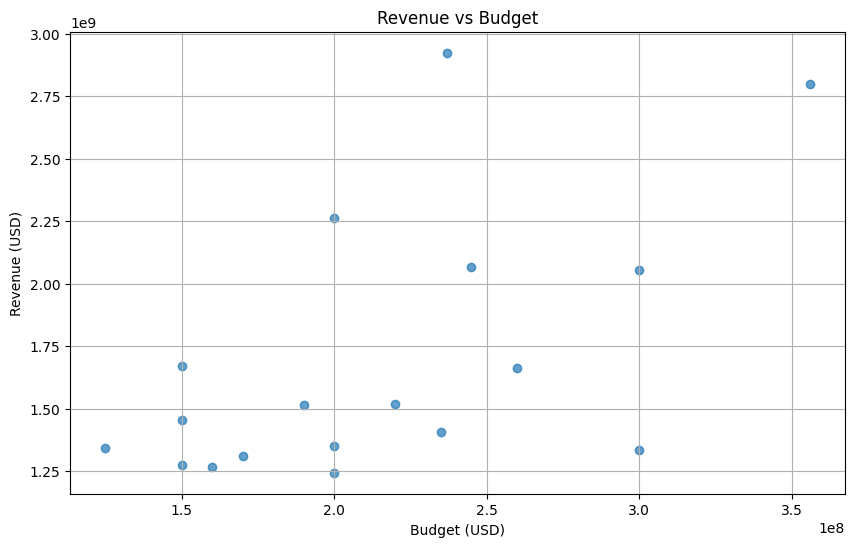

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(movies_df['budget'], movies_df['revenue'], alpha=0.7)
plt.title('Revenue vs Budget')
plt.xlabel('Budget (USD)')
plt.ylabel('Revenue (USD)')
plt.grid(True)
plt.show()


ROI Distribution by Genre

<Figure size 1200x600 with 0 Axes>

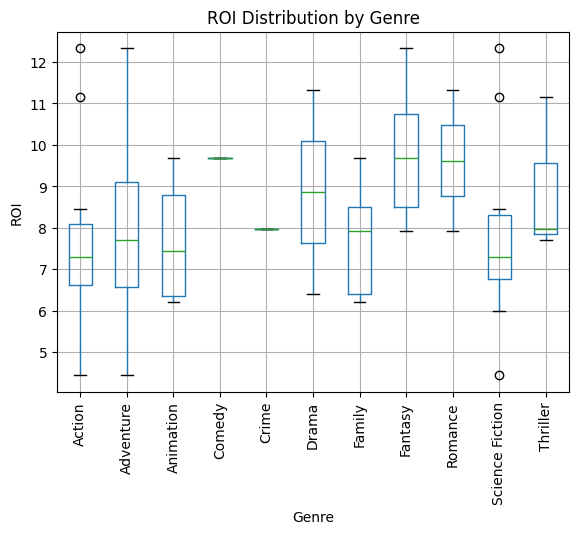

In [46]:
# explode genres first
df_genres = movies_df.copy()
df_genres['genres'] = df_genres['genres'].str.split('|')
df_genres = df_genres.explode('genres')

# plot ROI distribution
plt.figure(figsize=(12,6))
df_genres.boxplot(column='roi', by='genres', rot=90)
plt.title("ROI Distribution by Genre")
plt.suptitle("")
plt.xlabel("Genre")
plt.ylabel("ROI")
plt.show()


Popularity vs. Rating

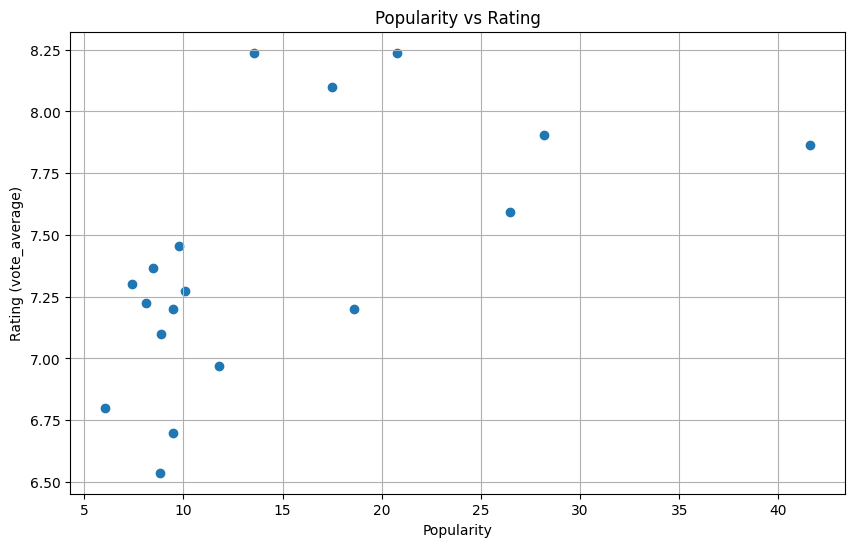

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(movies_df['popularity'], movies_df['vote_average'])
plt.xlabel("Popularity")
plt.ylabel("Rating (vote_average)")
plt.title("Popularity vs Rating")
plt.grid(True)
plt.show()


Yearly Trends in Box Office Performance

In [48]:
#Create a year column

movies_df['year'] = movies_df['release_date'].dt.year
yearly = movies_df.groupby('year')['revenue'].sum().reset_index()


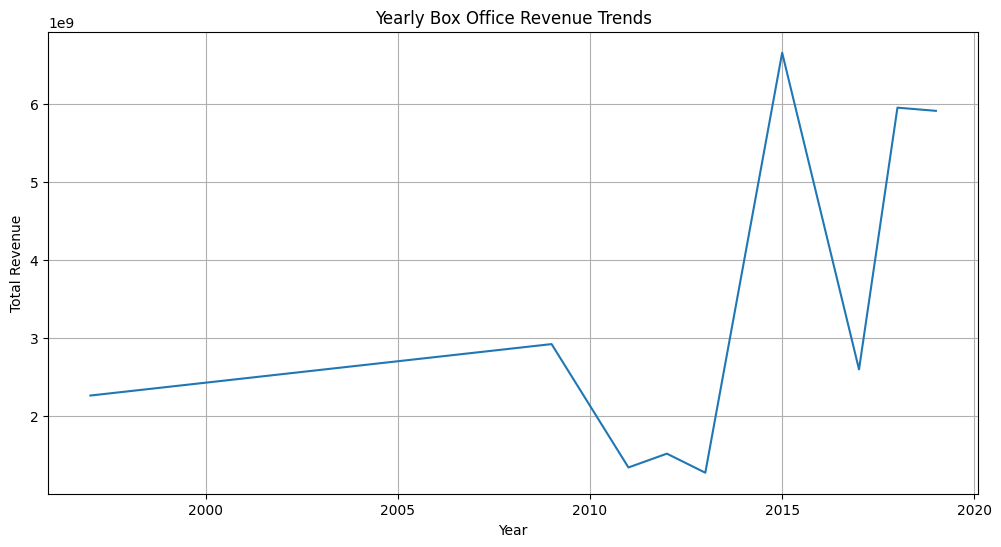

In [49]:
#Plot

plt.figure(figsize=(12,6))
plt.plot(yearly['year'], yearly['revenue'])
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.title("Yearly Box Office Revenue Trends")
plt.grid(True)
plt.show()


Franchise vs Standalone Success

In [50]:
franchise_stats = movies_df.groupby('franchise_type')[['revenue', 'roi', 'budget']].mean()

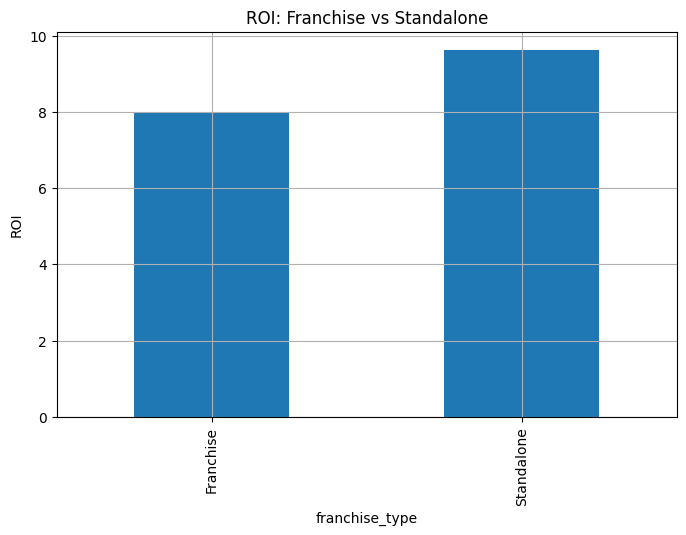

In [51]:
#ROI Comparison

plt.figure(figsize=(8,5))
franchise_stats['roi'].plot(kind='bar')
plt.title("ROI: Franchise vs Standalone")
plt.ylabel("ROI")
plt.grid(True)
plt.show()
